In [ ]:
!pip uninstall tensorflow


Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.9.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.9.2


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 1.7 MB 17.0 MB/s 
     |████████████████████████████████| 438 kB 45.2 MB/s 
     |████████████████████████████████| 5.9 MB 46.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import os
import argparse
import csv
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import functools
import tensorflow as tf
from keras import applications
from keras.preprocessing import image
from keras import layers
from keras import Model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import pandas 
from sklearn import (
    decomposition,
    manifold,
    pipeline,
)


In [3]:
# Importing data
! gdown --id 1_RX4RjPuNwWAuRSoiSpK_B_RQmHVIqgu

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_RX4RjPuNwWAuRSoiSpK_B_RQmHVIqgu
To: /content/thermal.zip
100% 9.15M/9.15M [00:00<00:00, 31.1MB/s]


In [4]:
# Unzip the archive
import zipfile
local_zip = '/content/thermal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
import os
base_dir = 'thermal'
lst_folders = os.listdir(base_dir)
print("Contents of train directory:")
print(sorted(lst_folders))

Contents of train directory:
['d1']


In [6]:
base_dir = 'thermal'
d1_dir = os.path.join(base_dir, 'd1')


# List of folders inside the train directory
lst_of_dirs = [d1_dir]

# Printing the number of files in each folder an the total number of images
sum_of_imgs = 0
for dir in lst_of_dirs:
  sum_of_imgs += len(os.listdir(dir))
  print('total training images in ' + dir + ':' , len(os.listdir(dir)))

print('\ntotal training images: ' + str(sum_of_imgs))
print()

# Printing few file names under each folder
print("File names in every folder: ")
for dir in lst_of_dirs:
  print(dir + ": " + str(os.listdir(dir)[:10]))

total training images in thermal/d1: 701

total training images: 701

File names in every folder: 
thermal/d1: ['20220725-205754.jpg', '20220720-150601.jpg', '20220726-201652.jpg', '20220722-023559.jpg', '20220719-075112.jpg', '20220720-000602.jpg', '20220722-224909.jpg', '20220720-113601.jpg', '20220722-113559.jpg', '20220721-213559.jpg']


thermal/d1/20220715-193723.jpg


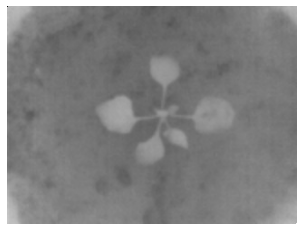

thermal/d1/20220715-195223.jpg


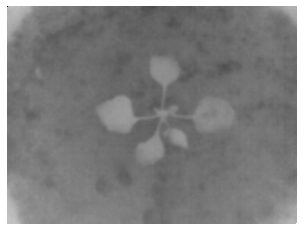

In [7]:
# Expectation: Since the images are time series, images from each foler must
# show us developement of plants in wells

# Utilities for displaying image to check the logic 
folder_file_dict = {}
for dir in lst_of_dirs:
  if dir not in folder_file_dict:
    name = dir[-2:] + '_files'
    folder_file_dict[name] = []

for k in folder_file_dict.keys():
  for dir in lst_of_dirs:
    if k[:2] == dir[-2:]:
      folder_file_dict[k].extend(os.listdir(dir))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sorted list of images
lst_of_cx_files = []
for v in folder_file_dict.values():
  lst_of_cx_files.append(sorted(v))

# List of 2 images 
pic_index = 2
display_lst = []
for cx_dir, cx_files in zip(lst_of_dirs, lst_of_cx_files):
  d = [os.path.join(cx_dir, fname) for fname in sorted(cx_files[pic_index-2:pic_index])]
  display_lst.append(d)

# List of images to be displayed
final_display = []
for d in display_lst:
  final_display += d

# Display each image
for i, img_path in enumerate(final_display):
  img = mpimg.imread(img_path)
  print(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [8]:
# Choosing a random image
import secrets
rand_sample_path = secrets.choice(final_display)
sample_image  = load_img(rand_sample_path)
# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)
print(f"Random image has a shape of: {sample_array.shape}")

# Check if all the images are of the same shape
all_paths = []
for cx_dir, cx_files in zip(lst_of_dirs, lst_of_cx_files):
  l = [os.path.join(cx_dir, fname) for fname in cx_files[:]]
  all_paths.append(l)

flat_lst_paths = [item for l in all_paths for item in l]
rnd_img_shape = sample_array.shape
cnt = 0
tot_imgs = len(flat_lst_paths)
for path in flat_lst_paths:
  _image  = load_img(path)
  _array = img_to_array(_image)
  if rnd_img_shape == _array.shape:
    cnt += 1
if cnt == tot_imgs:
  print("\nAll images are of the same size")

Random image has a shape of: (240, 320, 3)

All images are of the same size


In [9]:
import pickle

In [10]:
# Importing the model and methods for transfer learning
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from keras.applications.vgg16 import preprocess_input 

# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from image to numpy array
    img = img_to_array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

# The extracted features are stored in the HashMap otherwise stored in the 
# pickle file
all_images = flat_lst_paths
data = {}
p = r"/content/plant_features.pkl"

# loop through each image in the dataset
for image in all_images:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image, model)
        data[image] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data, file)

1/1 [==============================] - 1s 598ms/step


In [11]:
# List of the filenames
filenames = np.array(list(data.keys()))
# List of just the features
feat = np.array(list(data.values()))
# Reshaping the features
feat = feat.reshape(-1,4096)

Variance preserved by 50 components: 0.917
Variance preserved by 100 components: 0.956


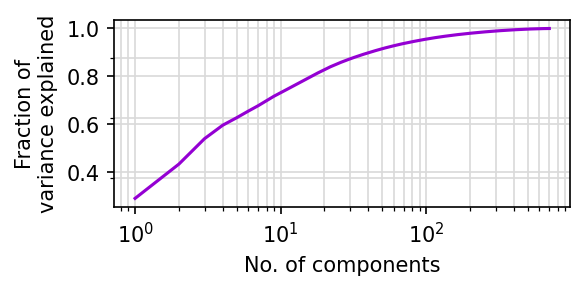

In [12]:
# Importing PCA from sklearn library
from sklearn.decomposition import PCA
pca_n = PCA(svd_solver='full')
x_pca_ = pca_n.fit_transform(feat)
var_ = pca_n.explained_variance_ratio_.cumsum()

# Plotting the fraction of variance explained vs. number of components 
fig, ax = plt.subplots(figsize=(4,2),dpi=150,)
ax.grid('on', which='both', color=np.ones(3)*0.85)
ax.plot(range(1,len(var_)+1), var_, color='darkviolet')
ax.set_xscale('log')
ax.set_xlabel('No. of components')
ax.set_ylabel('Fraction of\nvariance explained')
yt = np.linspace(1/4, 1, 4)
ytm = [np.mean([yt[i], yt[i+1]]) for i in range(len(yt)-1)]
ax.set_yticks(ytm, minor=True)
fig.tight_layout()

# Results

print('Variance preserved by 50 components: {:.3f}'.format(var_[50]))
print('Variance preserved by 100 components: {:.3f}'.format(var_[100]))

In [13]:
pca = PCA(n_components=50, svd_solver='full', random_state=22)
pca.fit(feat)
x = pca.transform(feat)
print("Features of " + str(feat.shape[0]) + " images before dimensionality reduction with PCA: " + str(feat.shape[1]))
print("Features of " + str(x.shape[0]) + " images before dimensionality reduction with PCA: " + str(x.shape[1]))

Features of 701 images before dimensionality reduction with PCA: 4096
Features of 701 images before dimensionality reduction with PCA: 50


In [14]:
import pandas as pd

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

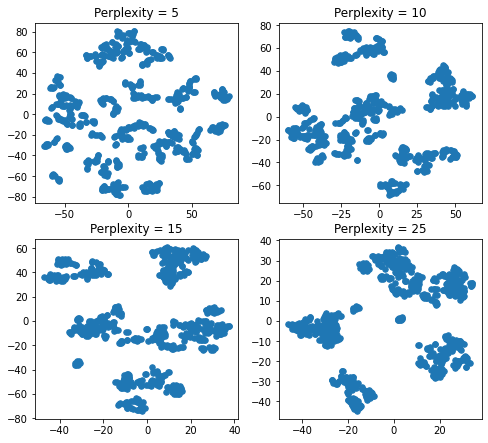

In [15]:
# Importing TSNE from sklearn
from sklearn.manifold import TSNE
# Plotting t-sne plots with different Perplexities
plt.figure(figsize = (8,4))
plt.subplots_adjust(top = 1.5)
list_of_perplexity = [5, 10, 15, 25]
for index, p in enumerate(list_of_perplexity):
    tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_results = tsne.fit_transform(x)
    tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], s=30)
    plt.title('Perplexity = '+ str(p))
plt.show()

Text(0, 0.5, 'Within-cluster Sum of Squares')

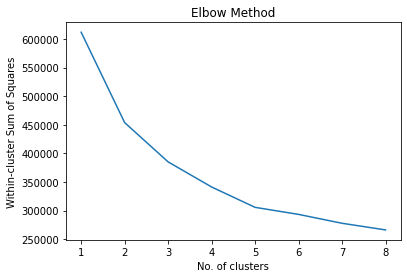

In [16]:
# Number of clusters of KMeans
from sklearn.cluster import KMeans
wcss = []
for i in range(1,9):
  kmeans = KMeans(i)
  kmeans.fit(feat)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

# Plotting the elbow 
no_clusters = range(1,9)
plt.plot(no_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel("No. of clusters")
plt.ylabel("Within-cluster Sum of Squares")

In [17]:
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans.fit(x)
labels = kmeans.labels_
print(str(len(np.unique(labels))) + " labels generated for " + str(len(labels)) + " images")
print("Unique ID's in generated labels: " + str(np.unique(labels)))

3 labels generated for 701 images
Unique ID's in generated labels: [0 1 2]


In [18]:
# Grouping all images and respective labels as key and value pairs
groups_imgs = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups_imgs.keys():
        groups_imgs[cluster] = []
        groups_imgs[cluster].append(file)
    else:
        groups_imgs[cluster].append(file)
print("Keys of each groups: " + str(groups_imgs.keys()))

Keys of each groups: dict_keys([1, 0, 2])


In [19]:
import pickle
pickle.dump(kmeans, open('kmeans_thermal.pkl', 'wb'))
pickle.dump(pca, open('pca_thermal.pkl', 'wb'))

In [20]:
kmeans_pkl = "kmeans_thermal.pkl"
pca_pkl= "pca_thermal.pkl"
pickled_kmeans = pickle.load(open(kmeans_pkl, 'rb'))
pickled_pca = pickle.load(open(pca_pkl, 'rb'))

# test_img_rotated = test_img_org.rotate(180)

/content/thermal/d1/20220729-103008.jpg


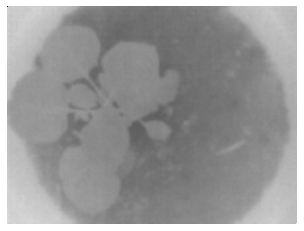

In [21]:
test_img_path = "/content/thermal/d1/20220729-103008.jpg"
test_img = mpimg.imread(test_img_path)
print(test_img_path)
plt.imshow(test_img)
plt.axis('Off')
plt.show()

In [22]:
test_data = {}
test_img_feat = extract_features(test_img_path, model)
test_data[test_img_path] = test_img_feat
test_filename = np.array(list(test_data.keys()))
print("Test image file name: " + str(test_filename[0]))
print("Shape of test image: " + str(test_img_feat.shape))
reduced_test_feat = pca.transform(test_img_feat)
print("Shape of pca reduced test image: " + str(reduced_test_feat.shape))

1/1 [==============================] - 1s 608ms/step
Test image file name: /content/thermal/d1/20220729-103008.jpg
Shape of test image: (1, 4096)
Shape of pca reduced test image: (1, 50)


In [23]:
# Prediction result
pickled_kmeans.predict(reduced_test_feat)

array([2], dtype=int32)